In [1]:
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/egorhowell/Youtube/main/Time-Series-Crash-Course/AirPassengers.csv',index_col=0)
data.index=pd.to_datetime(data.index)
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [13]:
train = data.iloc[:int(len(data) * 0.8)]
test = data.iloc[int(len(data) * 0.8):]

In [25]:
def plot_func(forecast: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['#Passengers'], name='Train'))
    fig.add_trace(go.Scatter(x=.index, y=test['#Passengers'], name='Test'))
    fig.add_trace(go.Scatter(x=test.index], y=forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Passenger Volume')
    
    return fig.show()

In [33]:
model = SimpleExpSmoothing(train['#Passengers']).fit(optimized=True)
forecasts = model.forecast(len(test))

C:\Users\VIJAY ISRANI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



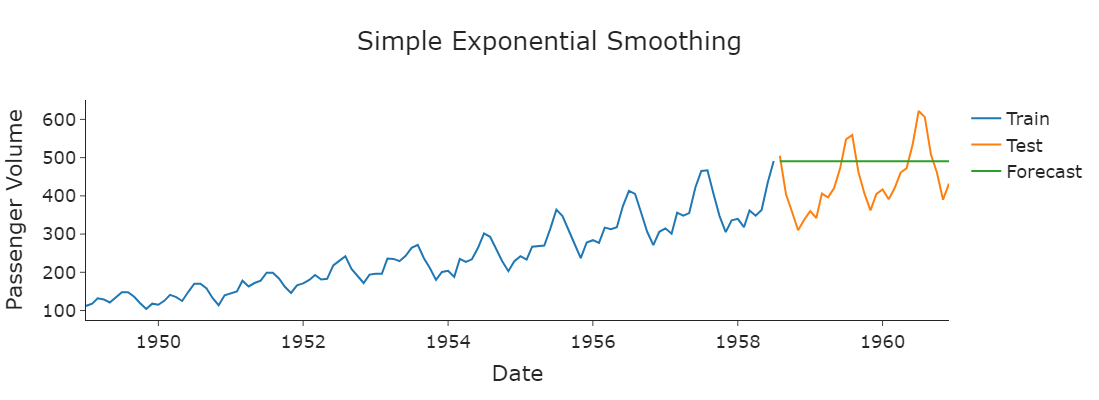

In [28]:
plot_func(forecasts, 'Simple Exponential Smoothing')

In [29]:
model.summary()

Dep. Variable:,#Passengers,No. Observations:,115
Model:,SimpleExpSmoothing,SSE,82833.260
Optimized:,True,AIC,760.660
Trend:,None,BIC,766.150
Seasonal:,None,AICC,761.024
Seasonal Periods:,None,Date:,"Mon, 01 Jul 2024"
Box-Cox:,False,Time:,14:47:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,112.00000,l.0,False
